In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [50]:
df = pd.read_csv('claimant.csv')

In [51]:
df.head()
df.drop(["CASENUM"], axis=1, inplace=True)

In [52]:
df['CLMINSUR'].isnull().sum()

np.int64(41)

In [53]:
df['CLMINSUR'] = df['CLMINSUR'].fillna(df['CLMINSUR'].median())

In [54]:
df['SEATBELT'].isnull().sum()

np.int64(48)

In [55]:
df['SEATBELT'] = df['SEATBELT'].fillna(df['SEATBELT'].median())

In [56]:
df['CLMAGE'].isnull().sum()

np.int64(189)

In [57]:
df['CLMAGE'] = df['CLMAGE'].fillna(df['CLMAGE'].median())

In [58]:
df['CLMSEX']=pd.get_dummies(df['CLMSEX'],drop_first=1)

In [59]:
df['CLMSEX']

0       False
1        True
2       False
3       False
4       False
        ...  
1335    False
1336     True
1337     True
1338     True
1339     True
Name: CLMSEX, Length: 1340, dtype: bool

In [60]:
df['CLMSEX'] = df['CLMSEX'].fillna(False).astype(int)


In [61]:
df['CLMSEX']

0       0
1       1
2       0
3       0
4       0
       ..
1335    0
1336    1
1337    1
1338    1
1339    1
Name: CLMSEX, Length: 1340, dtype: int64

In [48]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0,1.0,0.0,50.0,34.940
1,3,1,1,0.0,0.0,18.0,0.891
2,66,1,0,1.0,0.0,5.0,0.330
3,70,0,0,1.0,1.0,31.0,0.037
4,96,1,0,1.0,0.0,30.0,0.038


In [68]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [62]:
X = df[['CLMSEX','CLMINSUR','SEATBELT','CLMAGE','LOSS']]
y = df['ATTORNEY']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [65]:
from  sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [66]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,20,50],
             'max_iter':[100,200,300]}
classifier_regressor = GridSearchCV(classifier,param_grid =parameter,scoring = 'accuracy',cv = 5)

In [67]:
classifier_regressor.fit(X_train,y_train)

C:\Users\lions\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\lions\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\lions

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [1, 2, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also

In [69]:
print(classifier_regressor.best_params_)

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}


In [70]:
print(classifier_regressor.best_score_)

0.7044776119402985


In [71]:
y_pred = classifier_regressor.predict(X_test)

In [72]:
from  sklearn.metrics import accuracy_score, classification_report   

In [73]:
score = accuracy_score(y_pred,y_test)
print(score)

0.7223880597014926


In [74]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       139
           1       0.80      0.70      0.75       196

    accuracy                           0.72       335
   macro avg       0.72      0.73      0.72       335
weighted avg       0.73      0.72      0.72       335



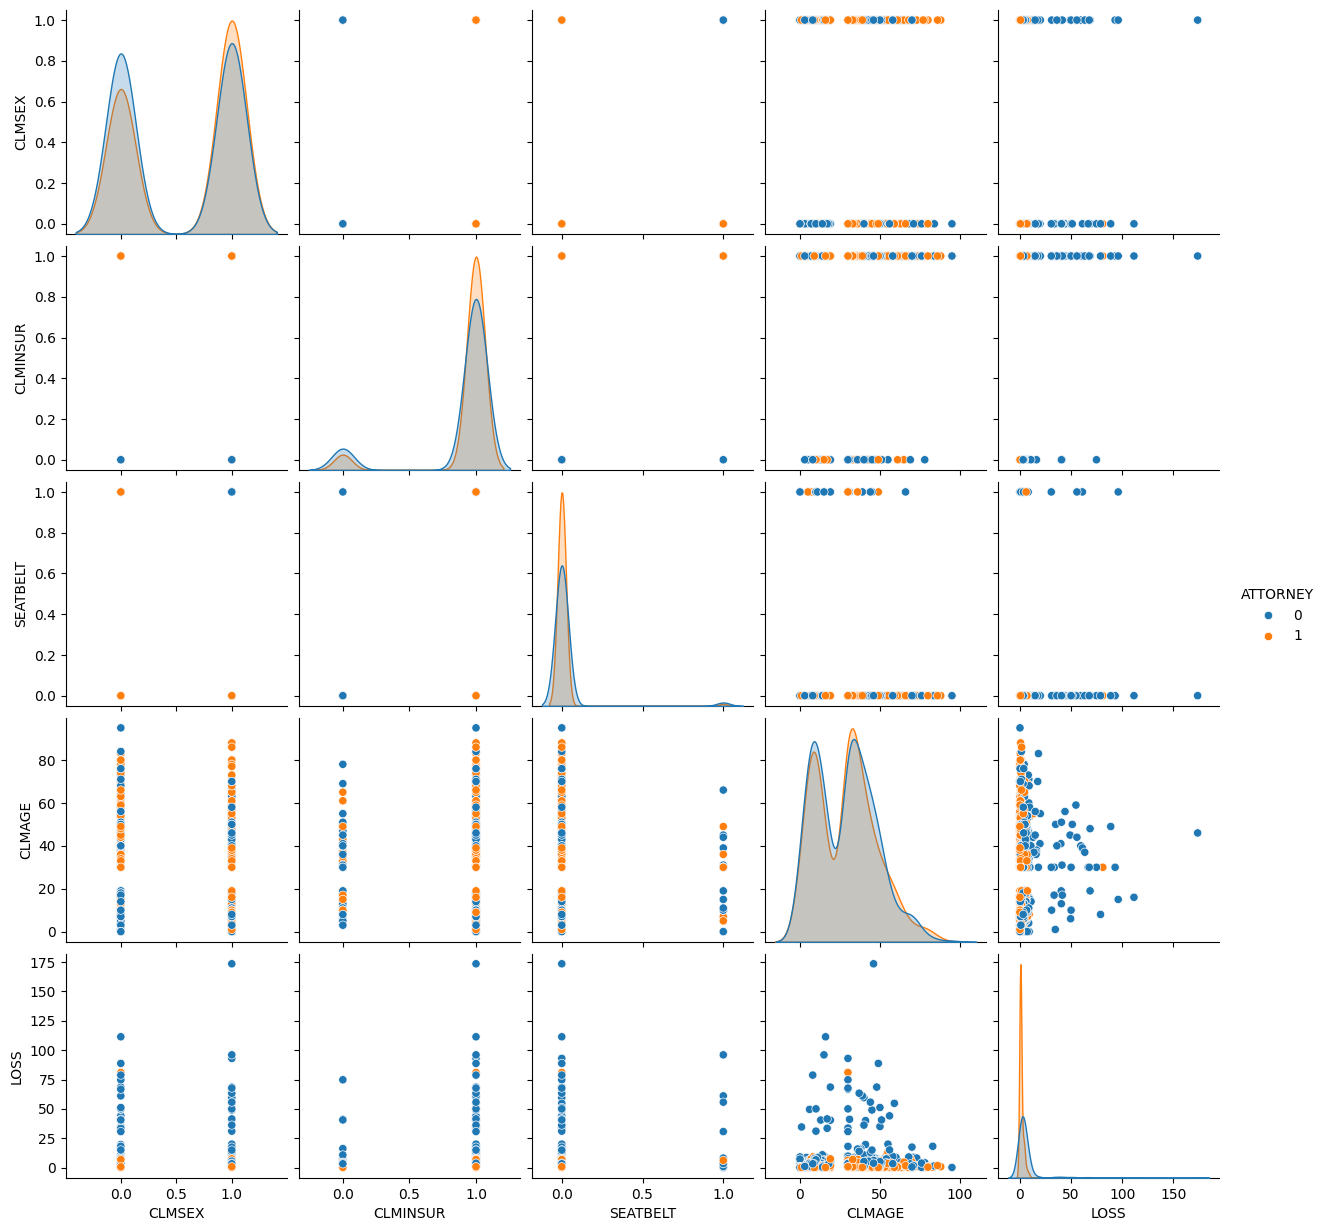

In [75]:
sns.pairplot(df,hue = 'ATTORNEY')

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
tree_model = DecisionTreeClassifier(max_depth = 3)

In [89]:
tree_model.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

[Text(0.5, 0.875, 'x[4] <= 1.033\ngini = 0.499\nsamples = 1005\nvalue = [521, 484]'),
 Text(0.25, 0.625, 'x[3] <= 5.5\ngini = 0.409\nsamples = 484\nvalue = [139, 345]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 0.592\ngini = 0.496\nsamples = 75\nvalue = [41, 34]'),
 Text(0.0625, 0.125, 'gini = 0.496\nsamples = 59\nvalue = [27, 32]'),
 Text(0.1875, 0.125, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\ngini = 0.364\nsamples = 409\nvalue = [98, 311]'),
 Text(0.3125, 0.125, 'gini = 0.356\nsamples = 405\nvalue = [94, 311]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.625, 'x[4] <= 4.818\ngini = 0.391\nsamples = 521\nvalue = [382, 139]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 32.0\ngini = 0.436\nsamples = 362\nvalue = [246.0, 116.0]'),
 Text(0.5625, 0.125, 'gini = 0.393\nsamples = 197\nvalue = [144.0, 53.0]'),
 Text(0.6875, 0.125, 'gini = 0.472\nsamples = 165\nvalue = [102, 63]'),
 

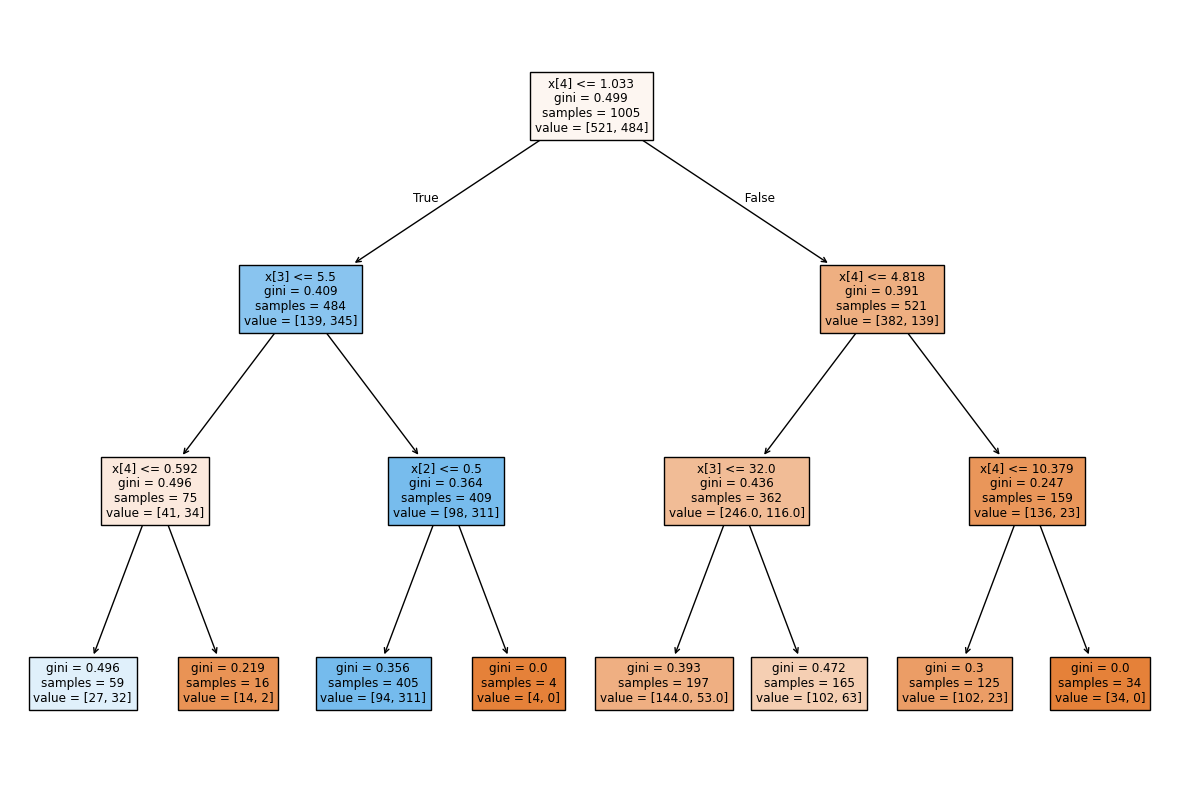

In [90]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(tree_model,filled = True)


In [91]:
y_pred = tree_model.predict(X_test)

In [92]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [93]:
from sklearn.metrics import accuracy_score,classification_report

In [94]:
score = accuracy_score(y_pred,y_test)
score

0.7313432835820896

In [95]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       172
           1       0.71      0.75      0.73       163

    accuracy                           0.73       335
   macro avg       0.73      0.73      0.73       335
weighted avg       0.73      0.73      0.73       335

